# 상관분석 & 다중회귀분석

✅ 'NanumGothic' 폰트가 확인되었습니다.
Current font family: ['NanumGothic']


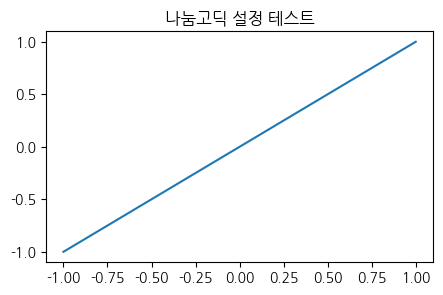

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import os

# 1. 나눔고딕 설치 여부 확인 및 이름 설정
# 윈도우에 나눔고딕이 설치되어 있다면 'NanumGothic'이라는 이름을 시스템이 인식합니다.
font_name = 'NanumGothic'

# 2. 폰트 매니저에서 해당 폰트가 있는지 확인 (검증 단계)
font_list = [f.name for f in fm.fontManager.ttflist]
if font_name not in font_list:
    # 나눔고딕이 없을 경우를 대비해 맑은 고딕을 예비용으로 설정
    print(f"⚠️ '{font_name}' 폰트를 찾을 수 없어 'Malgun Gothic'으로 대체합니다.")
    font_name = 'Malgun Gothic'
else:
    print(f"✅ '{font_name}' 폰트가 확인되었습니다.")

# 3. Matplotlib에 설정 적용
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False    # 마이너스 기호 깨짐 방지

# 4. 결과 확인
print("Current font family:", mpl.rcParams['font.family'])

# 테스트용 그래프
plt.figure(figsize=(5, 3))
plt.title('나눔고딕 설정 테스트')
plt.plot([-1, 0, 1], [-1, 0, 1])
plt.show()

In [5]:
# 0) 환경 설정 & 라이브러리 임포트
# ============================================
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os
from scipy.stats import pearsonr
import statsmodels.api as sm

# [윈도우 전용] 한글 폰트 설정 (맑은 고딕 또는 나눔고딕)
# 나눔고딕을 설치하셨다면 'NanumGothic', 아니라면 'Malgun Gothic'을 입력하세요.
font_name = 'Malgun Gothic' 
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

# ============================================
# 1) 데이터 불러오기 (로컬 경로)
# ============================================

# CSV 파일이 있는 경로를 직접 입력하세요. 
# 예: 'C:/Users/Name/Documents/data.csv' 
# 만약 쥬피터 노트북 파일(.ipynb)과 같은 폴더에 있다면 파일명만 적어도 됩니다.
CSV_PATH = "C:/Users/ebg13/OneDrive/바탕 화면/포트폴리오/BDA 부트캠프/브라질리언호텔_팀프로젝트/데이터셋/1.시도별_자살통합데이터.csv" 

if os.path.exists(CSV_PATH):
    df = pd.read_csv(CSV_PATH)
    print("✅ 데이터 미리보기")
    display(df.head())
else:
    print(f"❌ 파일을 찾을 수 없습니다. 경로를 확인해주세요: {os.path.abspath(CSV_PATH)}")

✅ 데이터 미리보기


,시도,연도,자살률,경제활동참가율,개인 소득,정신건강관련기관수,고령인구비율,고용률,우울감 경험률,실업률,스트레스 인지율,기초생활수급자수
0,서울특별시,2018,22.5,62.6,25053,578,14.4,59.6,4.9,4.8,27.7,289342
1,서울특별시,2019,22.5,62.7,26229,637,15.2,60.0,6.5,4.4,27.2,317269
2,서울특별시,2020,22.7,62.1,26428,680,16.1,59.3,6.3,4.6,29.5,369518
3,서울특별시,2021,22.6,62.3,27119,726,16.8,59.2,6.8,4.8,28.0,402632
4,서울특별시,2022,21.4,62.5,28187,758,17.6,60.4,7.1,3.4,25.7,412409


In [6]:
# 2) 자살률과 각 지표의 피어슨 상관 + p값 표
# ============================================
TARGET = "자살률"
exclude_cols = ["시도", "연도", TARGET]
num_cols = [c for c in df.columns if c not in exclude_cols]

results = []
for col in num_cols:
    # NaN 제거 후 상관
    sub = df[[TARGET, col]].dropna()
    if len(sub) < 3:
        corr, pval = np.nan, np.nan
    else:
        corr, pval = pearsonr(sub[TARGET], sub[col])
    results.append([col, corr, pval])

corr_df = pd.DataFrame(results, columns=["지표", "상관계수", "p값"]).sort_values("상관계수", key=lambda s: s.abs(), ascending=False)
print("\n✅ 자살률 vs 각 지표 상관계수(+p값)")
display(corr_df)



✅ 자살률 vs 각 지표 상관계수(+p값)


,지표,상관계수,p값
3,고령인구비율,0.521068,5.245387e-08
1,개인 소득,-0.435529,9.212019e-06
2,정신건강관련기관수,-0.402348,4.830436e-05
8,기초생활수급자수,-0.351915,4.380003e-04
4,고용률,0.173350,9.121218e-02
0,경제활동참가율,0.163603,1.112201e-01
6,실업률,-0.145280,1.578604e-01
5,우울감 경험률,0.111254,2.805278e-01
7,스트레스 인지율,0.014276,8.901988e-01


의미 있는 상관관계

고령인구비율 ↑ → 자살률 ↑ (상관계수 0.52)

개인소득 ↑ → 자살률 ↓ (상관계수 -0.44)

정신건강 관련 기관 수 ↑ → 자살률 ↓ (상관계수 -0.40)

기초생활수급자 수 ↑ → 자살률 ↓ (상관계수 -0.35)

유의하지 않은 지표
경제활동참가율, 고용률, 우울감 경험률, 실업률, 스트레스 인지율

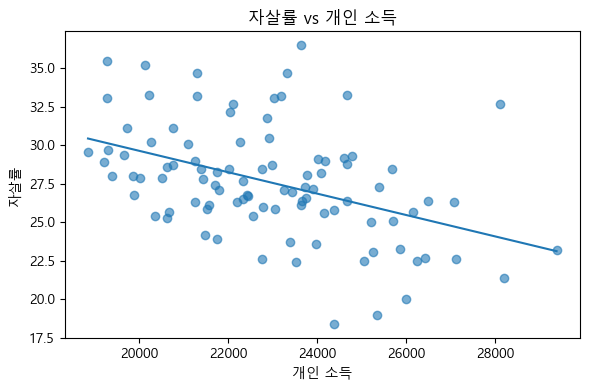

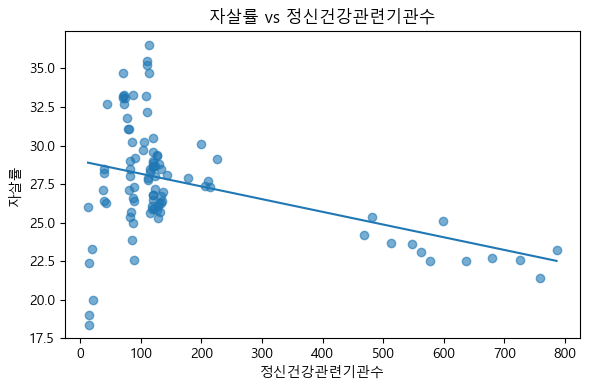

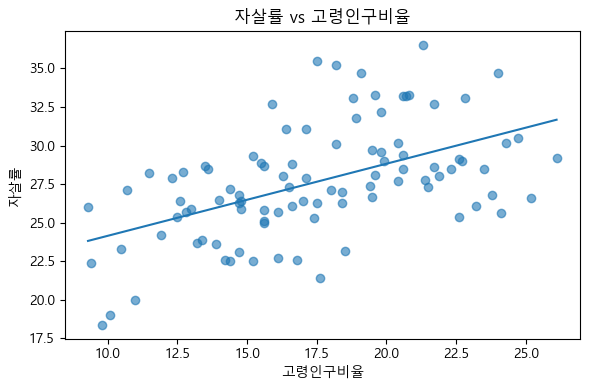

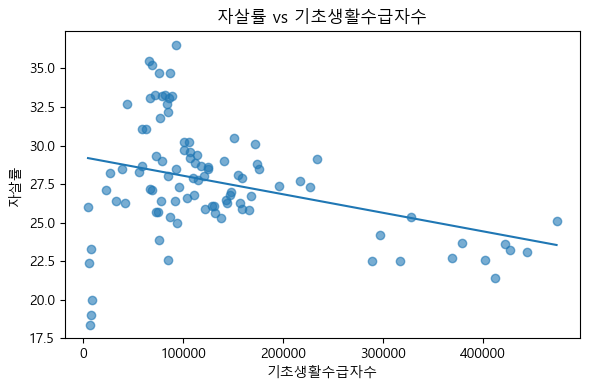

In [7]:
# 3) 산점도 + 단순회귀선 (자살률 vs 주요 지표)
#    - 여기서는 유의했던 변수들을 기본으로 그리되, 필요시 목록 수정
# ============================================
key_vars = ["개인 소득", "정신건강관련기관수", "고령인구비율", "기초생활수급자수"]
for var in key_vars:
    if var not in df.columns:
        continue

    x = df[var].values
    y = df[TARGET].values

    # 1차 회귀선 계수 계산 (y = a*x + b)
    coef = np.polyfit(x, y, 1)
    a, b = coef[0], coef[1]

    plt.figure(figsize=(6,4))
    plt.scatter(x, y, alpha=0.6)
    xs = np.linspace(np.nanmin(x), np.nanmax(x), 100)
    plt.plot(xs, a*xs + b)
    plt.title(f"자살률 vs {var}")
    plt.xlabel(var)
    plt.ylabel("자살률")
    plt.tight_layout()
    plt.show()

개인 소득 ↑ → 자살률 ↓ (음의 상관)

정신건강관련기관 수 ↑ → 자살률 ↓ (음의 상관)

고령인구비율 ↑ → 자살률 ↑ (양의 상관)

기초생활수급자 수 ↑ → 자살률 ↓ (음의 상관)

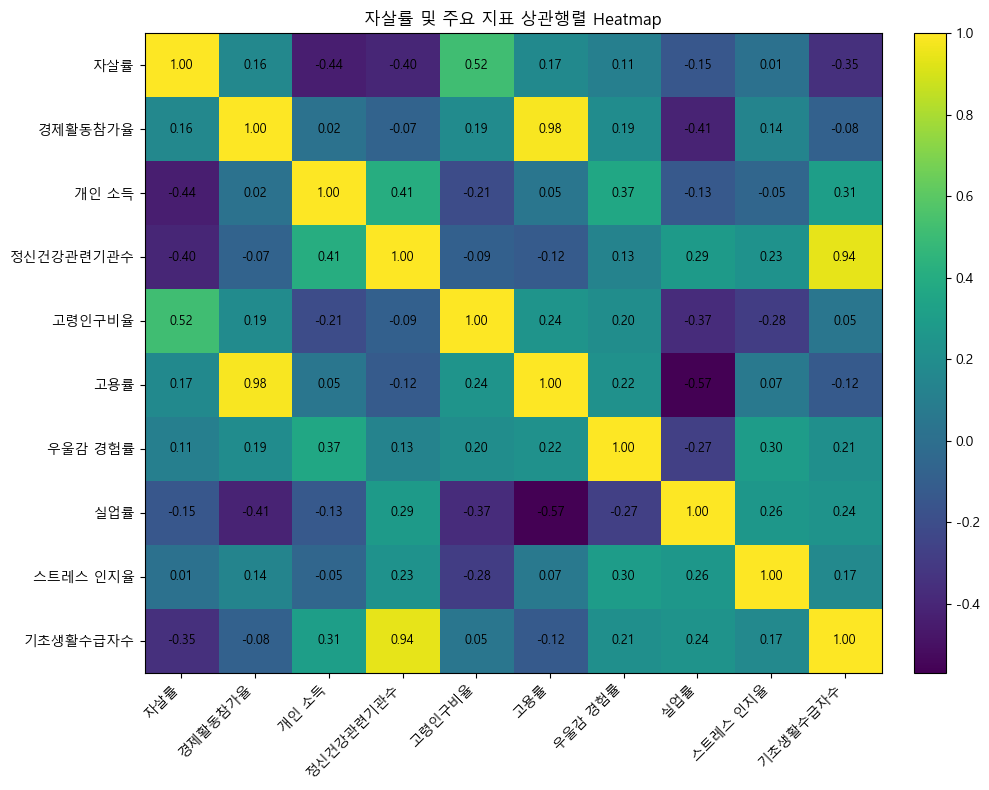

In [8]:
# 4) 전체 상관행렬 히트맵 (자살률 포함)
#    - seaborn 없이 matplotlib으로 구현
# ============================================
corr_matrix = df.drop(columns=["시도", "연도"]).corr()

plt.figure(figsize=(10,8))
im = plt.imshow(corr_matrix, aspect='auto')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(corr_matrix.index)), labels=corr_matrix.index)

# 셀에 수치 표시
for i in range(len(corr_matrix.index)):
    for j in range(len(corr_matrix.columns)):
        val = corr_matrix.iloc[i, j]
        plt.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=9, color='black')

plt.title("자살률 및 주요 지표 상관행렬 Heatmap")
plt.tight_layout()
plt.show()

자살률과 가장 강한 상관

고령인구비율 (r ≈ 0.52, 양의 상관)

개인소득 (r ≈ -0.44, 음의 상관)

정신건강관련기관 수 (r ≈ -0.40, 음의 상관)

기초생활수급자 수 (r ≈ -0.35, 음의 상관)

다른 지표들은 자살률과 뚜렷한 상관이 거의 없거나, 유의미하지 않음.

In [9]:
# 5) 다중회귀 (자살률 ~ 기타 모든 지표)
# ============================================
X = df.drop(columns=["시도", "연도", TARGET]).copy()
y = df[TARGET].copy()

# 결측 제거(완전 케이스) - 필요시 대체 방식 변경 가능
dataset = pd.concat([X, y], axis=1).dropna()
X_clean = dataset.drop(columns=[TARGET])
y_clean = dataset[TARGET]

X_const = sm.add_constant(X_clean)
model = sm.OLS(y_clean, X_const).fit()

print("\n✅ OLS 회귀 결과 요약")
print(model.summary())


✅ OLS 회귀 결과 요약
                            OLS Regression Results                            
Dep. Variable:                    자살률   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     11.44
Date:                Sun, 08 Feb 2026   Prob (F-statistic):           1.36e-11
Time:                        19:39:04   Log-Likelihood:                -221.98
No. Observations:                  96   AIC:                             464.0
Df Residuals:                      86   BIC:                             489.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4432     15.454    

모델 적합도

R² = 0.545 → 자살률 변동의 약 54.5%를 설명

F검정 p < 0.001 → 전체 모델은 통계적으로 유의

| 변수           | 계수 (coef)     | p값     | 해석                 |
| ------------ | ------------- | ------ | ------------------ |
| **고령인구비율**   | **+0.477**    | <0.001 | 고령인구비율 ↑ → 자살률 ↑   |
| **개인 소득**    | **-0.0005**   | 0.009  | 개인소득 ↑ → 자살률 ↓     |
| **기초생활수급자수** | **-0.000022** | 0.013  | 기초생활수급자수 ↑ → 자살률 ↓ |

경제활동참가율, 고용률, 우울감 경험률, 실업률, 스트레스 인지율, 정신건강관련기관수 → 통계적으로 유의하지 않음

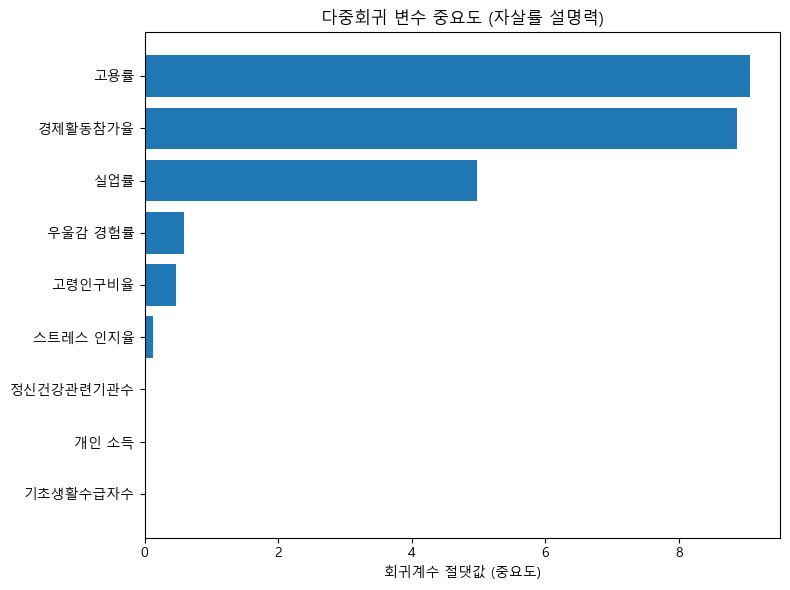


✅ 회귀계수 및 p값


,변수,계수,p값,중요도(절댓값)
4,고용률,-9.063873,1.416820e-01,9.063873
0,경제활동참가율,8.874346,1.391892e-01,8.874346
6,실업률,-4.979507,1.956632e-01,4.979507
5,우울감 경험률,0.583292,5.531070e-02,0.583292
3,고령인구비율,0.477144,2.342353e-07,0.477144
7,스트레스 인지율,0.127682,4.393101e-01,0.127682
2,정신건강관련기관수,0.005798,3.013871e-01,0.005798
1,개인 소득,-0.000463,9.006735e-03,0.000463
8,기초생활수급자수,-0.000022,1.329466e-02,0.000022


In [10]:
# 6) 변수 중요도(절댓값 계수) 바 차트
# ============================================
coef_series = model.params.drop(labels="const", errors='ignore')
pvals = model.pvalues.drop(labels="const", errors='ignore')

imp_df = pd.DataFrame({
    "변수": coef_series.index,
    "계수": coef_series.values,
    "p값": pvals.values,
})
imp_df["중요도(절댓값)"] = imp_df["계수"].abs()
imp_df = imp_df.sort_values("중요도(절댓값)")

plt.figure(figsize=(8,6))
plt.barh(imp_df["변수"], imp_df["중요도(절댓값)"])
plt.xlabel("회귀계수 절댓값 (중요도)")
plt.title("다중회귀 변수 중요도 (자살률 설명력)")
plt.tight_layout()
plt.show()

print("\n✅ 회귀계수 및 p값")
display(imp_df.sort_values("중요도(절댓값)", ascending=False))

1. "중요도(계수 절댓값)"와 "통계적 유의성(p값)"의 차이

중요도 그래프(회귀계수 크기)
→ 단순히 회귀식에서 특정 변수가 자살률에 끼치는 영향의 크기를 보여줌.
→ 계수가 크다는 건 “자살률을 많이 움직일 수 있는 변수”라는 뜻이지, 반드시 신뢰할 수 있다는 의미는 아님.

통계적 유의성(p값)
→ 이 변수가 실제로 영향이 있다고 검증할 수 있는지를 의미
→ p < 0.05일 때만 “유의하다”라고 보고, 그렇지 않으면 “우연히 나온 효과일 가능성이 높음”이라고 봄.

2. 왜 고용률·경제활동참가율이 중요도 높게 나오는데 유의하지 않나?

다중공선성(Multicollinearity) 때문일 가능성이 큼.

고용률 ↔ 경제활동참가율 ↔ 실업률은 서로 강하게 연관된 변수로, 회귀모델이 “누가 진짜 영향을 주는지”를 잘 구분 못 하고, 계수 크기는 크게 나오지만 p값이 커져서 유의하지 않게 보임.

3. 해석 방법

중요도(계수 절댓값) = 영향의 크기

p값 = 신뢰도

👉 따라서 “중요도가 크면서 p값도 작다” = 정말 중요한 지표.

👉 “중요도 크지만 p값 큼” = 다른 변수와 겹쳐서 불안정한 지표일 가능성이 높음.

In [11]:
# 7) (선택) 다중공선성 진단: 조건수(Condition Number)
#    - statsmodels summary에도 나오지만 별도 출력
# ============================================
# 조건수 계산(수치적으로 큰 값이면 다중공선성 의심)
u, s, vh = np.linalg.svd(X_const.values, full_matrices=False)
cond_number = s.max() / s.min()
print(f"\nℹ️ Condition Number (X): {cond_number:.2e}  (값이 매우 크면 다중공선성 가능성)")


ℹ️ Condition Number (X): 1.12e+07  (값이 매우 크면 다중공선성 가능성)


값이 매우 크게 나온 상황 → 독립변수들이 강하게 서로 상관되어 있다는 의미

In [13]:
# ============================================
# 노동시장 변수 단독 포함 회귀분석 비교
# ============================================
import statsmodels.api as sm
import pandas as pd

TARGET = "자살률"

# ------------------------
# 1) 경제활동참가율 모델
# ------------------------
X_act = df.drop(columns=["시도", "연도", TARGET, "고용률", "실업률"]).dropna().copy()
y_act = df[TARGET].loc[X_act.index]
X_const_act = sm.add_constant(X_act)
model_act = sm.OLS(y_act, X_const_act).fit()

# ------------------------
# 2) 실업률 모델
# ------------------------
X_unemp = df.drop(columns=["시도", "연도", TARGET, "고용률", "경제활동참가율"]).dropna().copy()
y_unemp = df[TARGET].loc[X_unemp.index]
X_const_unemp = sm.add_constant(X_unemp)
model_unemp = sm.OLS(y_unemp, X_const_unemp).fit()

# ------------------------
# 3) 고용률 모델
# ------------------------
X_employ = df.drop(columns=["시도", "연도", TARGET, "경제활동참가율", "실업률"]).dropna().copy()
y_employ = df[TARGET].loc[X_employ.index]
X_const_employ = sm.add_constant(X_employ)
model_employ = sm.OLS(y_employ, X_const_employ).fit()

# ------------------------
# 4) 결과 정리 함수
# ------------------------
def extract_summary(model, name):
    return pd.DataFrame({
        "변수": model.params.index,
        f"{name}_계수": model.params.values,
        f"{name}_p값": model.pvalues.values
    })

summary_act = extract_summary(model_act, "경제활동참가율")
summary_unemp = extract_summary(model_unemp, "실업률")
summary_employ = extract_summary(model_employ, "고용률")

# ------------------------
# 5) 주요 변수 비교 테이블
# ------------------------
compare_df = pd.concat([
    summary_act.set_index("변수"),
    summary_unemp.set_index("변수"),
    summary_employ.set_index("변수")
], axis=1)

key_vars = ["경제활동참가율", "실업률", "고용률", "고령인구비율", "개인 소득", "기초생활수급자수"]
print("✅ 노동시장 변수별 단독 포함 회귀 결과 비교")
display(compare_df.loc[key_vars])


✅ 노동시장 변수별 단독 포함 회귀 결과 비교


,경제활동참가율_계수,경제활동참가율_p값,실업률_계수,실업률_p값,고용률_계수,고용률_p값
변수,,,,,,
경제활동참가율,-0.015259,9.061884e-01,NaN,NaN,NaN,NaN
실업률,NaN,NaN,0.560636,2.026459e-01,NaN,NaN
고용률,NaN,NaN,NaN,NaN,-0.043451,7.225362e-01
고령인구비율,0.457777,3.825598e-07,0.488930,1.036088e-07,0.463535,3.442285e-07
개인 소득,-0.000516,3.404272e-03,-0.000471,8.005428e-03,-0.000512,3.722379e-03
기초생활수급자수,-0.000021,1.702060e-02,-0.000022,1.403797e-02,-0.000022,1.569137e-02


경제활동참가율, 실업률, 고용률 → 어느 하나만 넣어도 자살률과 유의미한 관계가 보이지 않음.
→ 즉, 노동시장 변수들은 자살률 설명력이 약하거나 서로 겹쳐서 명확한 해석이 어려움.

고령인구비율, 개인소득, 기초생활수급자수 → 어떤 모델에서도 일관되게 유의미한 변수로 확인됨.

# 시도별 분석

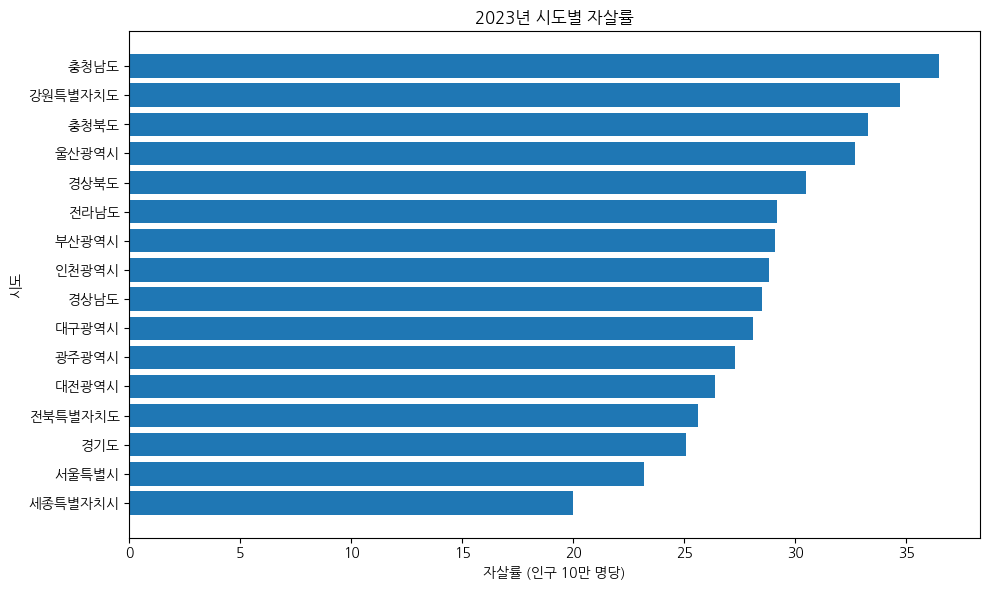

✅ 자살률 상위 5개 지역


,시도,자살률,고령인구비율,기초생활수급자수,개인 소득
0,충청남도,36.5,21.3,92992,23647
1,강원특별자치도,34.7,24.0,86667,23326
2,충청북도,33.3,20.8,81577,24667
3,울산광역시,32.7,15.9,43817,28102
4,경상북도,30.5,24.7,151253,22921


✅ 자살률 하위 5개 지역


,시도,자살률,고령인구비율,기초생활수급자수,개인 소득
0,대전광역시,26.4,17.0,77554,26493
1,전북특별자치도,25.6,24.1,131557,24157
2,경기도,25.1,15.6,474086,25696
3,서울특별시,23.2,18.5,427880,29372
4,세종특별자치시,20.0,11.0,8607,25995


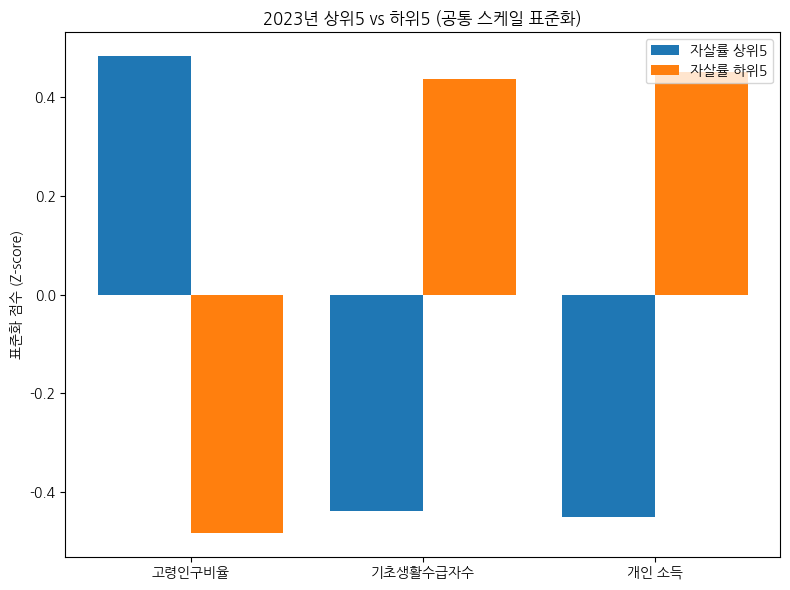

In [15]:
# (추가) 임포트
from sklearn.preprocessing import StandardScaler

# === 최신 연도 기준 시도별 자살률 막대그래프 ===
latest_year = df["연도"].max()
df_latest = df[df["연도"] == latest_year].copy()

df_latest_sorted = df_latest.sort_values("자살률", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_latest_sorted["시도"], df_latest_sorted["자살률"])
plt.gca().invert_yaxis()
plt.title(f"{latest_year}년 시도별 자살률")
plt.xlabel("자살률 (인구 10만 명당)")
plt.ylabel("시도")
plt.tight_layout()
plt.show()

# 상위/하위 5개 지역 추출 (필요 컬럼만 보유)
use_cols = ["시도","자살률","고령인구비율","기초생활수급자수","개인 소득"]
top5 = df_latest_sorted.head(5)[use_cols].reset_index(drop=True)
bottom5 = df_latest_sorted.tail(5)[use_cols].reset_index(drop=True)

print("✅ 자살률 상위 5개 지역")
display(top5)
print("✅ 자살률 하위 5개 지역")
display(bottom5)

# === 상위5 vs 하위5 주요 지표 평균 비교 (표준화 공통 스케일) ===
num_cols = ["고령인구비율","기초생활수급자수","개인 소득"]

# 1) 상·하위 묶어서 스케일러 학습
stack_for_fit = pd.concat([top5[num_cols], bottom5[num_cols]], axis=0)
scaler = StandardScaler().fit(stack_for_fit)

# 2) 같은 스케일러로 각각 변환
top5_scaled = pd.DataFrame(scaler.transform(top5[num_cols]),
                           columns=num_cols, index=top5["시도"])
bottom5_scaled = pd.DataFrame(scaler.transform(bottom5[num_cols]),
                              columns=num_cols, index=bottom5["시도"])

# 3) 지표별 평균
top5_mean = top5_scaled.mean()
bottom5_mean = bottom5_scaled.mean()

# 4) 시각화
x = range(len(num_cols))
plt.figure(figsize=(8,6))
plt.bar([i-0.2 for i in x], top5_mean.values, width=0.4, label="자살률 상위5")
plt.bar([i+0.2 for i in x], bottom5_mean.values, width=0.4, label="자살률 하위5")
plt.xticks(x, num_cols)
plt.ylabel("표준화 점수 (Z-score)")
plt.title(f"{latest_year}년 상위5 vs 하위5 (공통 스케일 표준화)")
plt.legend()
plt.tight_layout()
plt.show()

(1) 고령인구비율

자살률 상위5개 지역(파란색)이 양(+) 값 → 고령인구 비율이 평균보다 높은 편.

자살률 하위5개 지역(주황색)이 음(-) 값 → 고령인구 비율이 평균보다 낮은 편.
👉 자살률이 높은 지역일수록 고령화가 심하다는 특징.

(2) 기초생활수급자수

상위5는 음(-) 값, 하위5는 양(+) 값.
👉 오히려 기초생활수급자 수는 자살률이 낮은 지역에서 상대적으로 더 많다는 결과.
(즉, “경제적 취약계층 비율이 많다 → 자살률이 높다”라는 직관적 가설과는 다르게 나온 부분)

(3) 개인 소득

상위5는 음(-) 값, 하위5는 양(+) 값.
👉 자살률이 높은 지역일수록 개인 소득이 낮다, 반대로 낮은 지역은 소득이 높다는 경향이 확인됨.


* 한국의 자살률은 고령화와 소득 수준과 더 밀접한 연관성을 보임.

* 다만 기초생활수급자수는 예상과 달리 자살률과 같은 방향성이 아니었음 →

이는 수급자 제도가 최소한의 안전망 역할을 해서 **“절대 빈곤층은 보호되지만, 제도 밖의 취약계층”**이 더 큰 위험군일 수 있음을 시사.

# 연도별 분석



✅ 연도별 전국 평균 미리보기


,연도,자살률,고령인구비율,개인 소득,기초생활수급자수
0,2018,28.26875,15.33125,20657.4375,107533.3125
1,2019,28.02500,16.06875,21608.8750,116064.6250
2,2020,26.63750,17.00625,22478.6250,131594.6875
3,2021,27.50000,17.82500,23246.6250,145451.6250
4,2022,26.65000,18.73125,24494.4375,151122.9375
5,2023,28.68750,19.68125,24973.6250,157472.3750


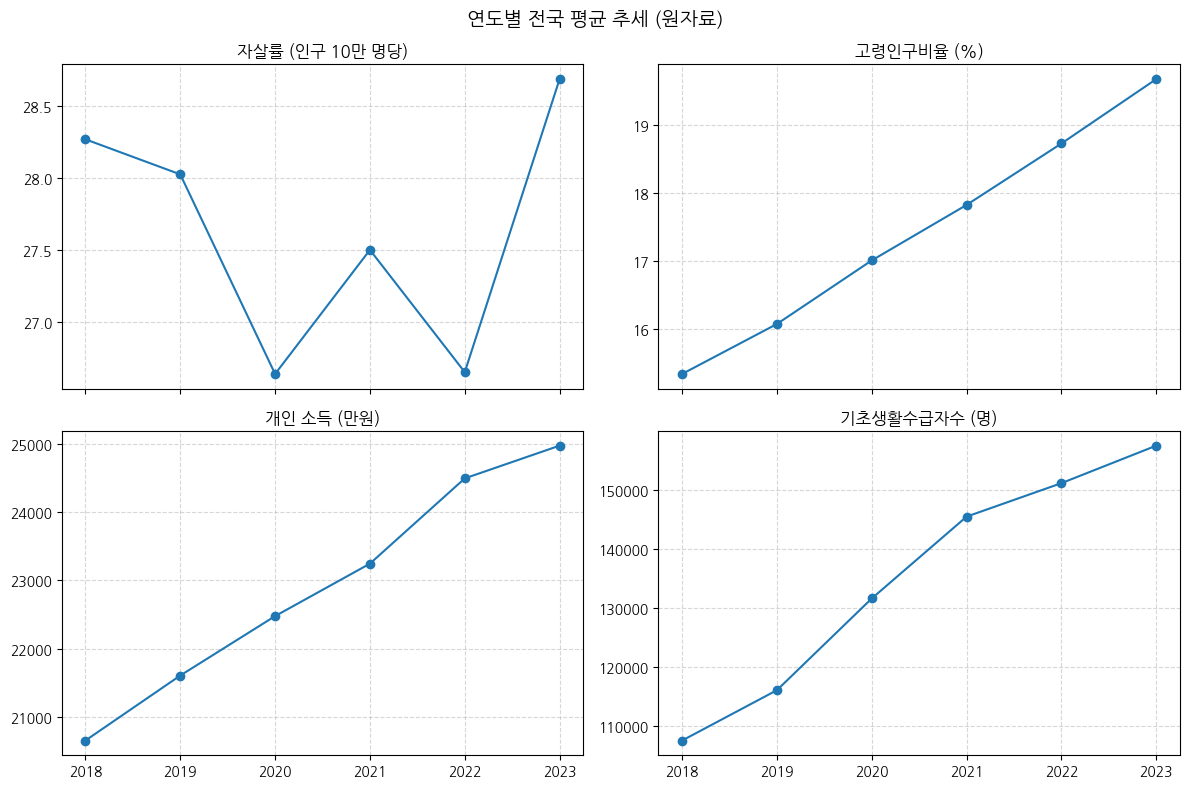

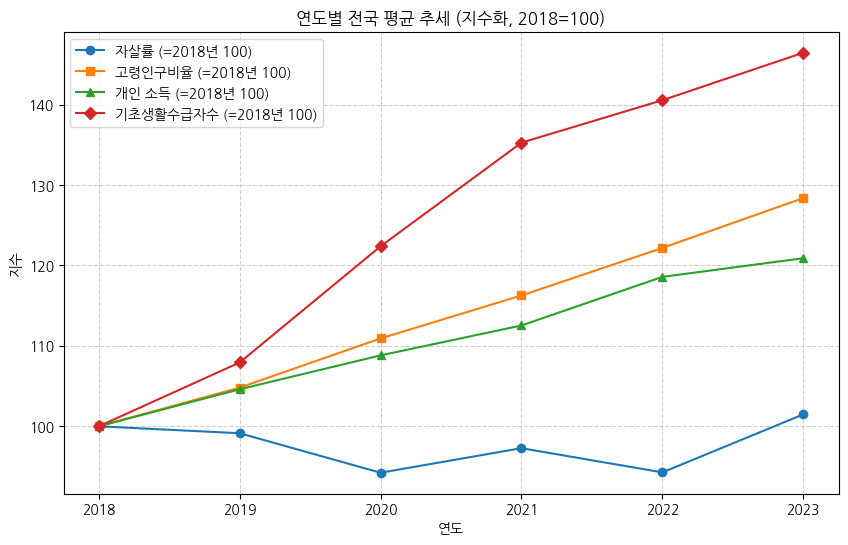

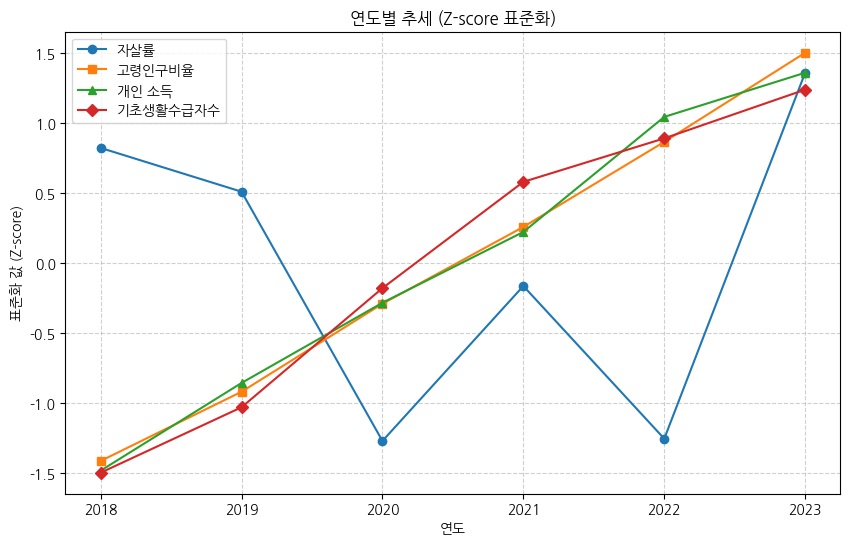

In [19]:
# ====== 0) 폰트/임포트 ======
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib
matplotlib.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ====== 1) 데이터 불러오기 ======
# df = pd.read_csv('/content/시도별_자살_통합데이터.csv')
# 이미 df가 있다면 위 줄은 생략
use_cols = ["연도","자살률","고령인구비율","개인 소득","기초생활수급자수"]
yearly = df[use_cols].groupby("연도", as_index=False).mean().sort_values("연도")

print("✅ 연도별 전국 평균 미리보기")
display(yearly)

# ====== 2A) 원자료 4분할 그래프 ======
fig, axes = plt.subplots(2,2, figsize=(12,8), sharex=True)
axes = axes.ravel()

series_list = [
    ("자살률 (인구 10만 명당)", "자살률"),
    ("고령인구비율 (%)", "고령인구비율"),
    ("개인 소득 (만원)", "개인 소득"),
    ("기초생활수급자수 (명)", "기초생활수급자수"),
]

for ax, (title, col) in zip(axes, series_list):
    ax.plot(yearly["연도"], yearly[col], marker="o")
    ax.set_title(title)
    ax.grid(True, linestyle="--", alpha=0.5)

fig.suptitle("연도별 전국 평균 추세 (원자료)", fontsize=14)
plt.tight_layout()
plt.show()

# ====== 2B) 2018=100 지수화(Index)로 한 그래프 ======
idx_cols = ["자살률","고령인구비율","개인 소득","기초생활수급자수"]
base_year = yearly["연도"].min()
base = yearly.loc[yearly["연도"]==base_year, idx_cols].iloc[0]

indexed = yearly.copy()
for c in idx_cols:
    indexed[c] = yearly[c] / base[c] * 100

plt.figure(figsize=(10,6))
for c, m in zip(idx_cols, ["o","s","^","D"]):
    plt.plot(indexed["연도"], indexed[c], marker=m, label=f"{c} (={base_year}년 100)")

plt.title(f"연도별 전국 평균 추세 (지수화, {base_year}=100)")
plt.xlabel("연도"); plt.ylabel("지수")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ====== 2C) Z-score 표준화로 한 그래프 ======
z_cols = ["자살률","고령인구비율","개인 소득","기초생활수급자수"]
scaler = StandardScaler()
z = yearly.copy()
z[z_cols] = scaler.fit_transform(z[z_cols])

plt.figure(figsize=(10,6))
for c, m in zip(z_cols, ["o","s","^","D"]):
    plt.plot(z["연도"], z[c], marker=m, label=c)
plt.title("연도별 추세 (Z-score 표준화)")
plt.xlabel("연도"); plt.ylabel("표준화 값 (Z-score)")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**자살률은 전국 평균 기준으로 뚜렷한 증가·감소 추세가 없는 "등락형 패턴"**을 보임.

반면 고령화·소득·기초수급자 수는 꾸준히 상승세를 보이고 있음.

따라서 연도 단위의 추세에서는 자살률과 이 지표들이 직접적으로 "같이 움직인다"고 보기는 어려움.

하지만 지역별 분석에서는 앞서 본 것처럼 고령인구비율·소득·수급자 수와 자살률이 통계적으로 연관성을 가질 수 있음 → 즉, "지역 차이"가 더 중요한 설명 요인일 가능성이 큼.



✅ 최신 연도: 2023, 표본 수(시도 수) = 16


,연도,시도,자살률,고령인구비율,개인 소득,기초생활수급자수
5,2023,서울특별시,23.2,18.5,29372,427880
11,2023,부산광역시,29.1,22.6,24026,234657
17,2023,대구광역시,28.1,19.6,23760,154802
23,2023,인천광역시,28.8,16.6,24665,174116
29,2023,광주광역시,27.3,16.5,25378,96473


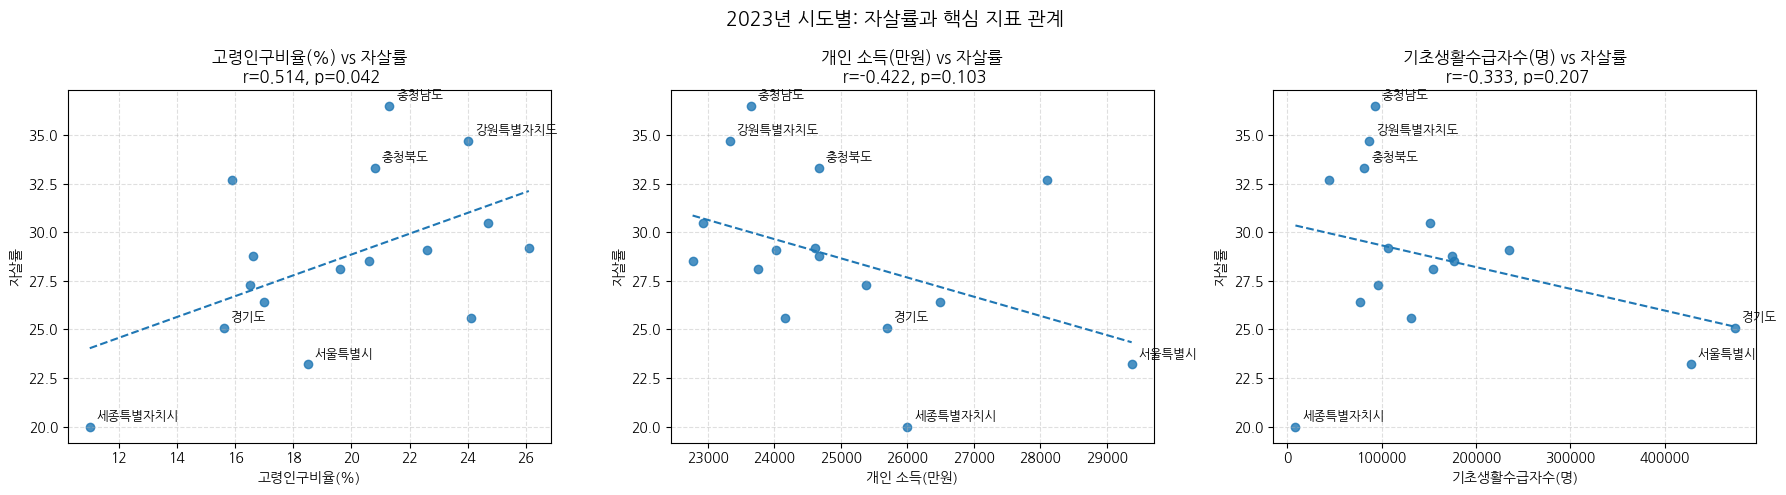

/tmp/ipython-input-3803985775.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_by_year, labels=order_years, showfliers=False)


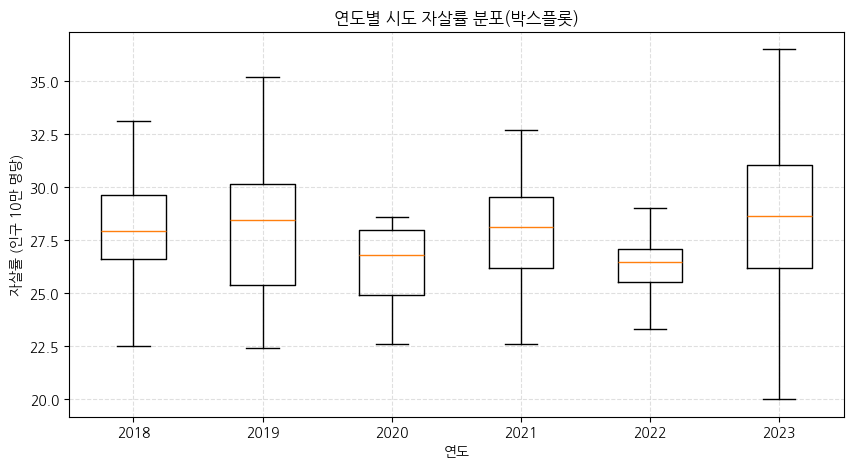

✅ 2023년 단면 회귀 요약
                            OLS Regression Results                            
Dep. Variable:                    자살률   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     2.341
Date:                Wed, 20 Aug 2025   Prob (F-statistic):              0.125
Time:                        06:34:14   Log-Likelihood:                -41.736
No. Observations:                  16   AIC:                             91.47
Df Residuals:                      12   BIC:                             94.56
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8222     20.633   

In [20]:
# 지역(시도) 중심 분석 패키지
# - 최신 연도 산점도(자살률 vs 핵심 지표 3종) + r,p
# - 연도별 시도 분포(자살률 박스플롯)
# - 최신 연도 단면 다중회귀 요약
# =========================

# 0) 폰트/임포트
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib
matplotlib.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

# 1) 데이터 준비
# df = pd.read_csv('/content/시도별_자살_통합데이터.csv')  # 이미 df가 있으면 생략
req_cols = ["연도","시도","자살률","고령인구비율","개인 소득","기초생활수급자수"]
assert set(req_cols).issubset(df.columns), "필요 컬럼명이 누락되었습니다. 컬럼명을 확인하세요."

latest_year = df["연도"].max()
df_latest = df.loc[df["연도"]==latest_year, req_cols].dropna().copy()

print(f"✅ 최신 연도: {latest_year}, 표본 수(시도 수) = {df_latest.shape[0]}")
display(df_latest.head())

# 2) 유틸: 산점도 + 1차 회귀선 + r,p 표시
def scatter_with_fit(ax, x, y, xlab, ylab="자살률", annotate_top=3):
    # 산점
    ax.scatter(x, y, alpha=0.8)
    # 회귀선
    coef = np.polyfit(x, y, 1)
    xs = np.linspace(np.min(x), np.max(x), 100)
    ax.plot(xs, coef[0]*xs + coef[1], linestyle='--')
    # 상관계수
    r, p = pearsonr(x, y)
    ax.set_xlabel(xlab); ax.set_ylabel(ylab)
    ax.set_title(f"{xlab} vs {ylab}\n r={r:.3f}, p={p:.3f}")
    ax.grid(True, linestyle="--", alpha=0.4)
    # 상위/하위 아웃라이어 간단 라벨링(자살률 기준)
    idx = np.argsort(y.values)
    pick = list(idx[:annotate_top]) + list(idx[-annotate_top:])
    for i in pick:
        ax.annotate(df_latest["시도"].iloc[i], (x.iloc[i], y.iloc[i]), xytext=(5,5), textcoords="offset points", fontsize=9)

# 3) 최신 연도 산점도 3종 (고령인구·소득·수급자수)
fig, axes = plt.subplots(1, 3, figsize=(18,5))
scatter_with_fit(axes[0], df_latest["고령인구비율"], df_latest["자살률"], "고령인구비율(%)")
scatter_with_fit(axes[1], df_latest["개인 소득"], df_latest["자살률"], "개인 소득(만원)")
scatter_with_fit(axes[2], df_latest["기초생활수급자수"], df_latest["자살률"], "기초생활수급자수(명)")
fig.suptitle(f"{latest_year}년 시도별: 자살률과 핵심 지표 관계", fontsize=14)
plt.tight_layout()
plt.show()

# 4) 연도별 시도 분포(자살률 박스플롯): 지역 격차의 크기 확인용
order_years = sorted(df["연도"].unique())
data_by_year = [df.loc[df["연도"]==y, "자살률"].dropna().values for y in order_years]

plt.figure(figsize=(10,5))
bp = plt.boxplot(data_by_year, labels=order_years, showfliers=False)
plt.title("연도별 시도 자살률 분포(박스플롯)")
plt.xlabel("연도"); plt.ylabel("자살률 (인구 10만 명당)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

# 5) 최신 연도 단면 다중회귀(자살률 ~ 고령인구 + 소득 + 수급자수)
X = df_latest[["고령인구비율","개인 소득","기초생활수급자수"]].copy()
y = df_latest["자살률"].copy()
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(f"✅ {latest_year}년 단면 회귀 요약")
print(model.summary())

1. 시도별 상관분석 (2023년)

고령인구비율 vs 자살률

r = 0.514, p = 0.042 → 양의 상관관계, 통계적으로 유의

고령인구 비율이 높은 지역일수록 자살률이 높게 나타남.

충청북도, 강원도 등이 고령화와 자살률이 모두 높은 대표적인 지역.

개인소득 vs 자살률

r = -0.422, p = 0.103 → 음의 상관관계지만 유의하지 않음

소득이 높을수록 자살률은 낮아지는 경향이 있으나, 뚜렷하다고 보기는 어려움.

예: 서울은 소득이 높고 자살률이 낮은 편, 반대로 충청북도는 소득이 낮고 자살률이 높은 편.

기초생활수급자수 vs 자살률

r = -0.333, p = 0.207 → 약한 음의 상관, 유의하지 않음

예상과 달리 수급자가 많다고 해서 자살률이 반드시 높지는 않음.

서울, 경기처럼 수급자는 많지만 자살률이 낮은 지역이 영향을 주었을 가능성.

---------------------------------

2. 연도별 분포 (박스플롯)

연도별 중앙값은 크게 변하지 않았지만, **분산(범위)**은 2023년에 다시 넓어졌습니다.

즉, 지역별 격차가 최근 들어 다시 커졌다는 뜻 → 어떤 지역은 자살률이 높고, 어떤 지역은 낮아지는 양극화 현상이 나타남.

---------------------------------

3. 다중회귀분석 결과 (2023년 단면)

설명력 (R²) = 0.369 → 세 변수(고령화·소득·수급자수)가 자살률의 약 37% 정도만 설명.

개별 변수 유의성

고령인구비율: 양의 관계, 그러나 p=0.131 → 통계적으로 유의하지 않음

개인 소득: 음의 관계, p=0.777 → 매우 비유의

기초생활수급자수: 음의 관계, p=0.242 → 비유의

종합 해석:
상관분석에서는 고령화와 자살률이 관련 있어 보였으나, 회귀분석에서는 다른 요인들과 함께 고려했을 때 통계적으로 확실한 설명 변수는 없음.
→ 즉, **다른 숨은 변수(예: 정신건강 서비스 접근성, 지역 사회적 요인 등)**가 더 중요할 수 있다는 의미.

  ## 결과 요약

* 지역별 자살률 격차는 크고, 최근 더 벌어지는 추세

* 고령인구비율은 자살률과 가장 뚜렷한 양의 상관을 보임 (특히 고령화가 심한 충북·강원 등).

* 소득과 기초수급자수는 자살률과 뚜렷한 연관이 없음 (데이터 상 유의성 부족).

* 다중회귀에서는 세 변수 모두 통계적으로 뚜렷한 영향력을 보이지 못함 → 단순히 경제적·인구학적 변수만으로 자살률을 설명하기 어렵다는 결론.